# BPSK Implementation

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Union
from numpy.typing import NDArray

## Constants

In [42]:
VMAX = 5
BAUD_RATE = 1000  # symbols per second

## Helper Functions

In [43]:
def Msg_to_Bin(msg: str) -> List[str]:
    return [format(ord(char), '08b') for char in msg]

def Symbol_Mapping(char: str) -> float:
    return VMAX if (char == "1") else -VMAX

def Carrier_Signal(f_c: float, f_s: float, time: float) -> NDArray[np.float64]:
    t = np.arange(0, time, 1/f_s)
    return np.sin(2 * np.pi * f_c * t)

def BPSK_Modulation(Symbols: List[float], 
                    Carrier_Samples: NDArray[np.float64], 
                    samples_per_symbol: int) -> NDArray[np.float64]:
    # Convert symbols to numpy array and repeat
    upsampled_symbols = np.repeat(Symbols, samples_per_symbol)
    
    # Trim to match carrier length
    min_length = min(len(upsampled_symbols), len(Carrier_Samples))
    upsampled_symbols = upsampled_symbols[:min_length]
    carrier_samples = Carrier_Samples[:min_length]
    
    return upsampled_symbols * carrier_samples

In [44]:
def plot_signals(binary: List[str], 
                modulated: NDArray[np.float64], 
                f_s: float) -> None:
    import matplotlib.pyplot as plt
    
    t = np.arange(len(modulated)) / f_s
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, modulated)
    plt.title('BPSK Modulated Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [45]:
def main() -> None:
    message = "Hi"
    f_c = 1000  # Carrier frequency (Hz)
    f_s = 16000 # Sampling frequency (Hz)
    time = 1    # Time duration (seconds)
    print("Input message is:" ,message)
    # Get binary sequence
    binary_seq = Msg_to_Bin(message)
    print("The binary sequence is:\t", binary_seq)
    # Convert to symbol sequence using list comprehension
    symbols = [Symbol_Mapping(bit) for binary_char in binary_seq 
              for bit in binary_char]
    print("The symbol mapping for sequence:\n" ,symbols)
    
    # Generate carrier
    carrier = Carrier_Signal(f_c, f_s, time)
    print("Length of carrier signal samples:", len(carrier))
    # Calculate samples per symbol
    samples_per_symbol = int(f_s / BAUD_RATE)
    print("Samples per symbol:", samples_per_symbol)
    # Modulate
    bpsk_signal = BPSK_Modulation(symbols, carrier, samples_per_symbol)
    print("Length of bpsk signal:" ,len(bpsk_signal))
    plot_signals(binary_seq, bpsk_signal, f_s)

Input message is: Hi
The binary sequence is:	 ['01001000', '01101001']
The symbol mapping for sequence:
 [-5, 5, -5, -5, 5, -5, -5, -5, -5, 5, 5, -5, 5, -5, -5, 5]
Length of carrier signal samples: 16000
Samples per symbol: 16
Length of bpsk signal: 256


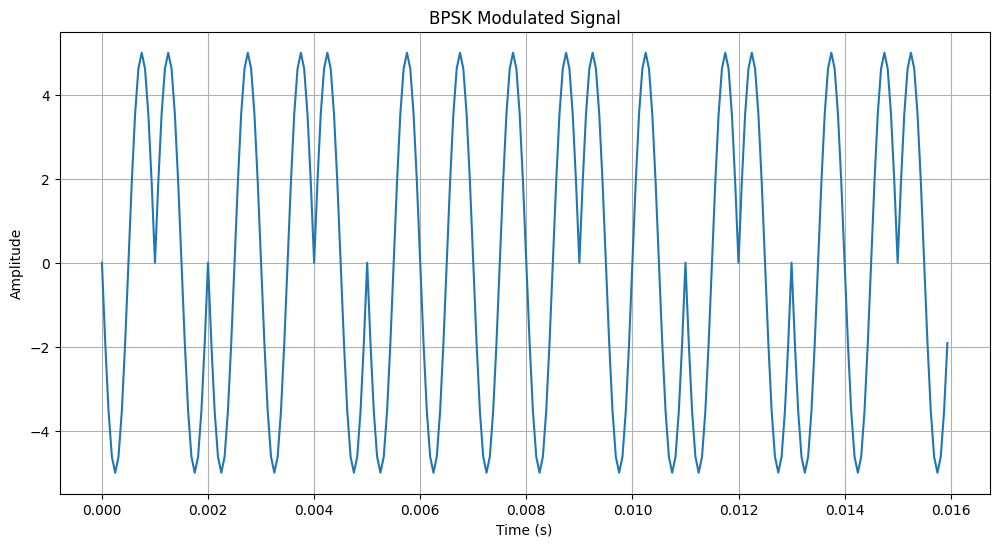

In [46]:
if __name__ == "__main__":
    main()

# QPSK Implementation